In [1]:
from IPython.display import Markdown, display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def printmd(string):
    display(Markdown(string))

# Load the dataset
data_path = 'INF2178_A4_data.csv'
df = pd.read_csv(data_path)

# Pivot the dataset based on 'Visit' and 'MMSE' scores
df_stages = df.pivot(index='Subject ID', columns='Visit', values='MMSE').reset_index()

# Rename the columns based on the unique values in the 'Visit' column
visit_columns = ['Subject'] + [f'stage_{int(visit)}' for visit in sorted(df['Visit'].unique())]
df_stages.columns = visit_columns

# Drop rows with missing values for simplicity
df_stages.dropna(inplace=True)
df.head(10)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
6,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
7,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
8,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
9,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380


<ipython-input-2-fbbdf5e40243>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_stages.iloc[:, i].values, bins=bins, label=f'{stage}')
<ipython-input-2-fbbdf5e40243>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_stages.iloc[:, i].values, bins=bins, label=f'{stage}')


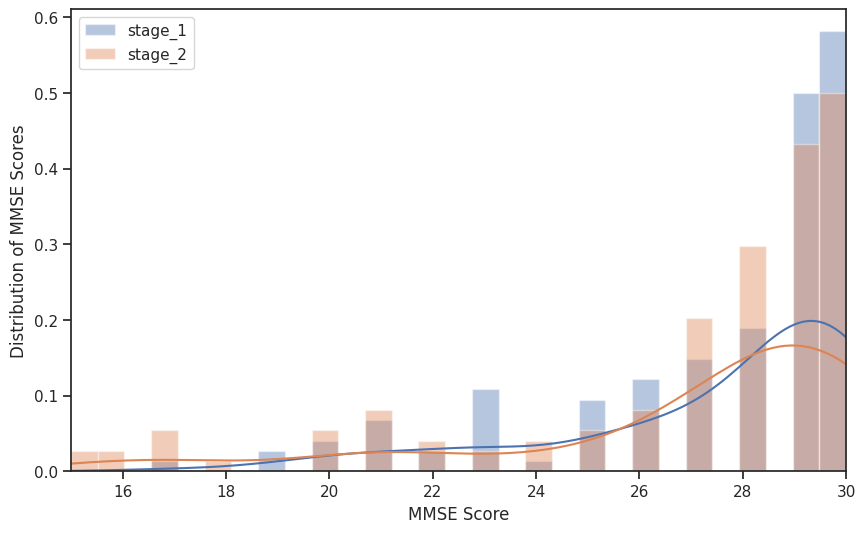

In [2]:
sns.set(style="ticks")
bins = np.linspace(df_stages.iloc[:, 1:].min().min(), df_stages.iloc[:, 1:].max().max(), 30)

# Plot distributions for each stage
plt.figure(figsize=(10, 6))
for i, stage in enumerate(visit_columns[1:], start=1):
    sns.distplot(df_stages.iloc[:, i].values, bins=bins, label=f'{stage}')

plt.xlabel('MMSE Score')
plt.ylabel('Distribution of MMSE Scores')
plt.legend()
plt.xlim((df_stages.iloc[:, 1:].min().min(), df_stages.iloc[:, 1:].max().max()))
plt.show()

In [3]:
# Calculate means for each stage and the grand mean
means = df_stages.iloc[:, 1:].mean()
grand_mean = df_stages.iloc[:, 1:].values.flatten().mean()

# Print the means
for stage, mean in zip(visit_columns[1:], means):
    printmd(f'Mean for {stage}: {round(mean, 3)}')
printmd(f'Grand mean: {round(grand_mean, 3)}')

# Number of samples for each stage
n = len(df_stages)
n_stages = [n] * (len(visit_columns) - 1)

# SS groups
SS_groups = sum([n * (mean - grand_mean) ** 2 for n, mean in zip(n_stages, means)])
printmd(f'SS groups: {round(SS_groups, 3)}')

Mean for stage_1: 27.503

Mean for stage_2: 26.944

Grand mean: 27.224

SS groups: 22.378

In [4]:
SSw = sum([np.sum((df_stages[stage].values - mean) ** 2) for stage, mean in zip(visit_columns[1:], means)])
printmd(f'SSw = {round(SSw, 3)}')

SSw = 3353.301

In [5]:
# Degrees of freedom for groups and error
k = len(visit_columns) - 1  # Number of groups
df_groups = k - 1
df_error = n * (k - 1)

# Mean squares
MS_groups = SS_groups / df_groups
MS_error = SSw / df_error

# F-statistic
F_statistic = MS_groups / MS_error

printmd(f'MS groups: {round(MS_groups, 3)}')
printmd(f'MS error: {round(MS_error, 3)}')
printmd(f'F-statistic: {round(F_statistic, 3)}')
printmd(f'DF groups: {int(df_groups)}, DF error: {int(df_error)}')

MS groups: 22.378

MS error: 23.45

F-statistic: 0.954

DF groups: 1, DF error: 143